In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from NN_funcs import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [2]:
def load_dataset():
    train_dataset = h5py.File(r"D:\python\datasets\train_catvnoncat.h5")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

y = 0. It's a non-cat picture.


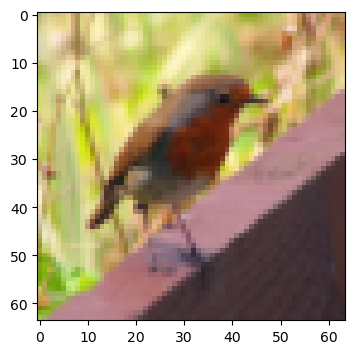

In [4]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [6]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [7]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [9]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID."""
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(A_prev = X, W = W1, b = b1, activation = 'relu')
        A2, cache2 = linear_activation_forward(A1, W = W2, b = b2, activation= 'sigmoid')
        cost = compute_cost(A2, Y)

        # back propagation starts
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache = cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache = cache1, activation='relu')

        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        parameters['W1'] = W1-(learning_rate*dW1)
        parameters['W2'] = W2-(learning_rate*dW2)
        parameters['b1'] = b1-(learning_rate*db1)
        parameters['b2'] = b2-(learning_rate*db2)

        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
            

In [10]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                         # keep track of cost
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL,Y)
        grads =  L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [11]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.6930497356599891
Cost after first iteration: 0.6930497356599891


In [38]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2200, print_cost = True)

Cost after iteration 0: 0.6930497356599891


Cost after iteration 100: 0.646562724952651
Cost after iteration 200: 0.6315419463820401
Cost after iteration 300: 0.595537317243947
Cost after iteration 400: 0.5421801496174474
Cost after iteration 500: 0.49098442241667034
Cost after iteration 600: 0.4940870086739634
Cost after iteration 700: 0.4026491108375372
Cost after iteration 800: 0.4707465175386042
Cost after iteration 900: 0.5238815541154821
Cost after iteration 1000: 0.6803065781332472
Cost after iteration 1100: 0.6404555530296712
Cost after iteration 1200: 0.6168698345576136
Cost after iteration 1300: 0.5684381233267516
Cost after iteration 1400: 0.5135017592013503
Cost after iteration 1500: 0.4831342038430125
Cost after iteration 1600: 0.5171771401283565
Cost after iteration 1700: 0.4625814147539936
Cost after iteration 1800: 0.43597995333317
Cost after iteration 1900: 0.6485952713533889
Cost after iteration 2000: 0.517710745845808
Cost after iteration 2100: 0.6513578515045981
Cost after iteration 2199: 0.5857733094015909


In [39]:
pred_train = predict(train_x, train_y, parameters)

In [40]:
pred_test = predict(test_x, test_y, parameters)

[[0.61658959]] class Cat


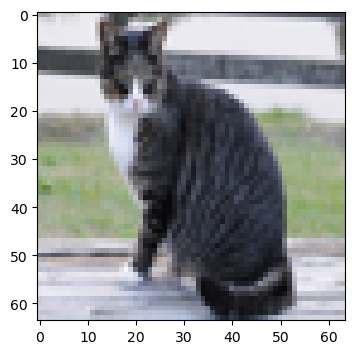

In [50]:
my_image = r"D:\python\cat2.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname =  my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)

if my_predicted_image>=0.5:
    print(my_predicted_image,'class Cat')
else:
    print(my_predicted_image,'class: nonCat')
